In [1]:
# The datasets package needs to be loaded to access our data 
# For a full list of these datasets, type library(help = "datasets")
library(datasets)
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [3]:
iris[1:5,1:5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

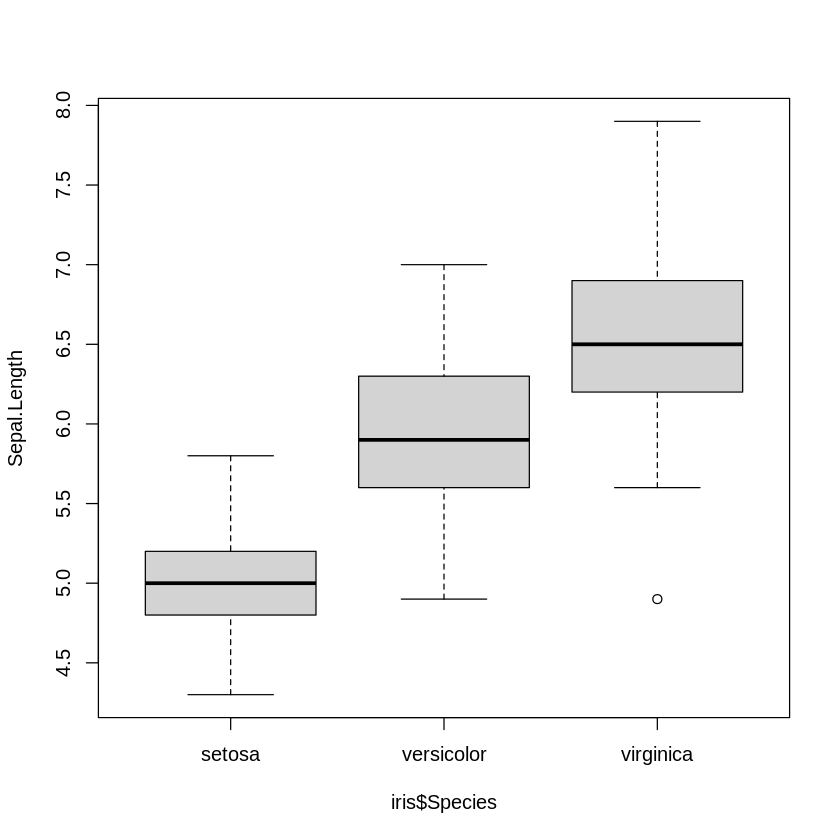

In [6]:
boxplot(iris$Sepal.Length ~ iris$Species,ylab="Sepal.Length")

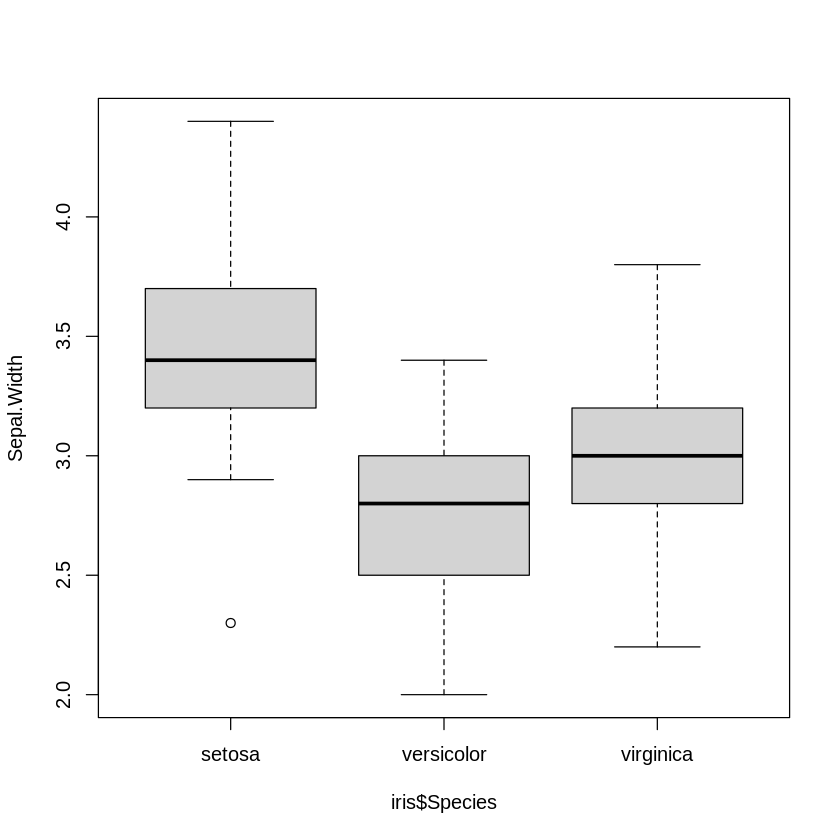

In [7]:
boxplot(iris$Sepal.Width ~ iris$Species,ylab="Sepal.Width")

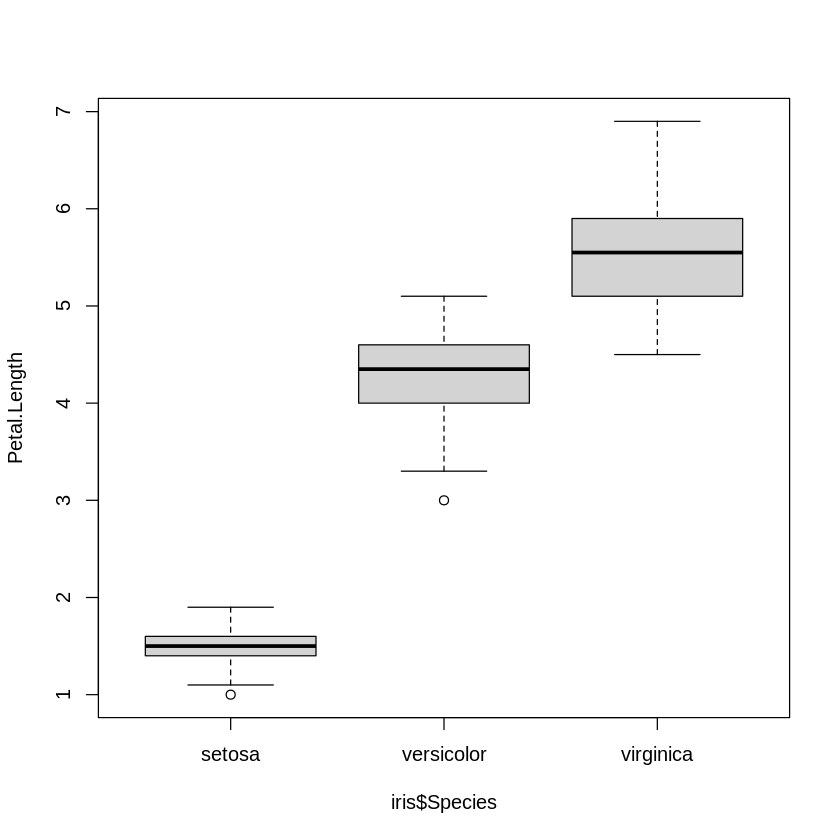

In [8]:
boxplot(iris$Petal.Length ~ iris$Species,ylab="Petal.Length")

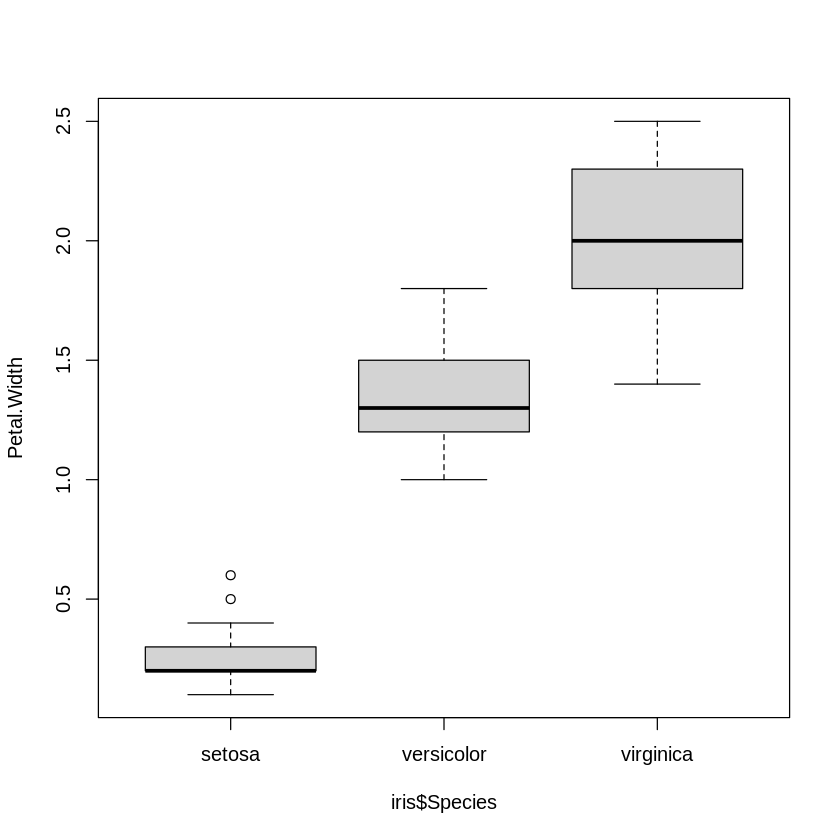

In [10]:
boxplot(iris$Petal.Width ~ iris$Species,ylab="Petal.Width")

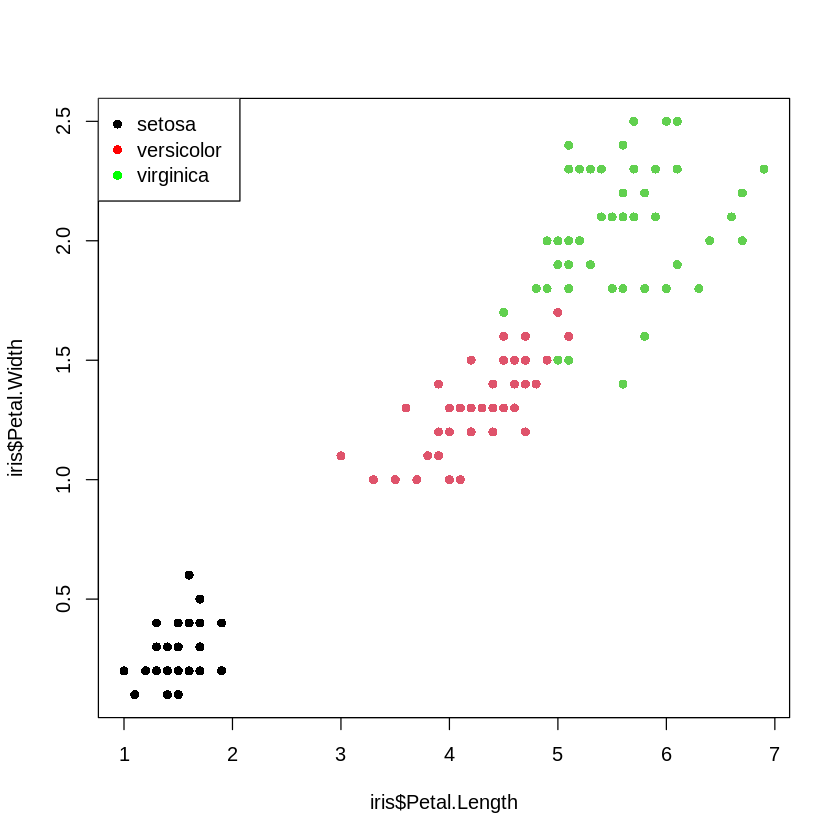

In [12]:
plot(iris$Petal.Length,iris$Petal.Width,col=iris$Species,pch=16)
legend( x="topleft", 
    legend=levels(as.factor(iris$Species)),
    col=c("black","red","green"), 
    pch=c(16) )

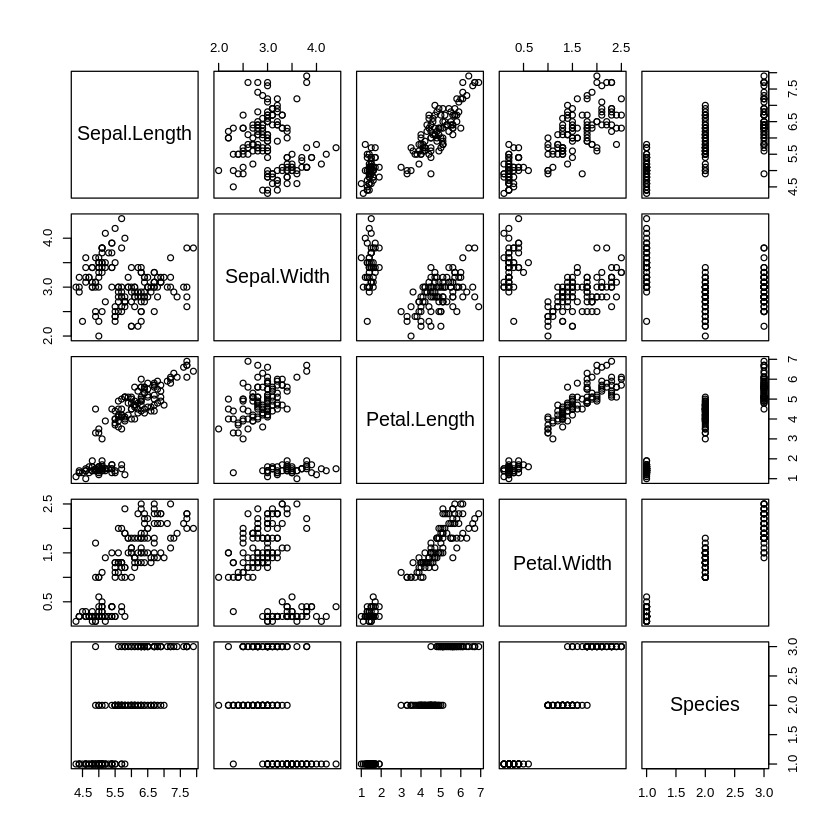

In [19]:
plot(iris)

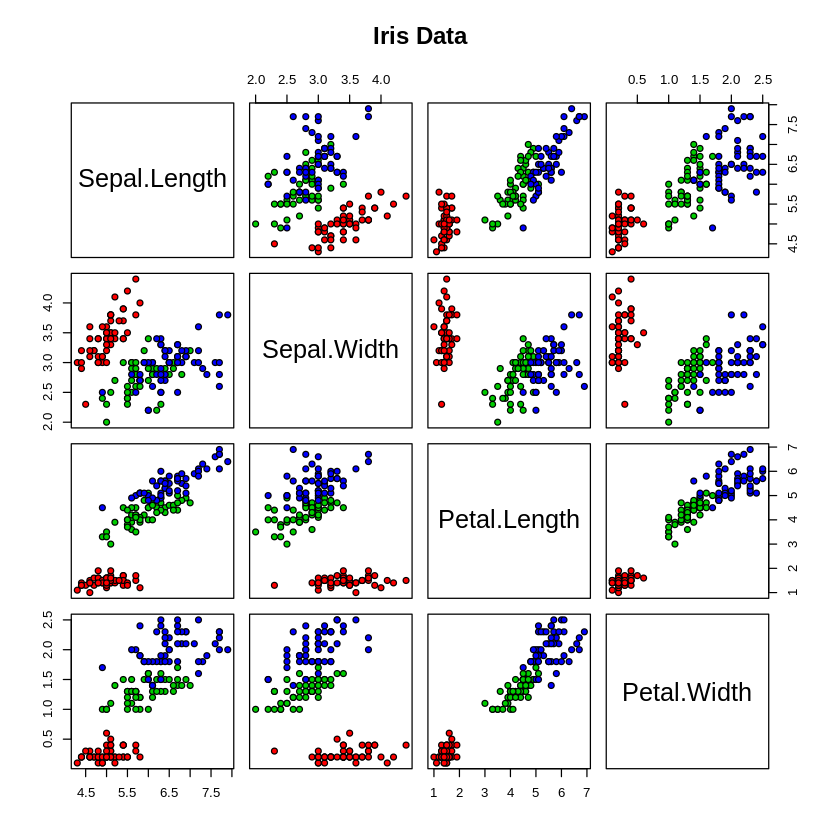

In [18]:
pairs(iris[1:4], main = "Iris Data", pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])

In [20]:
# First we create a copy of our dataset
iris_copy <- iris

# We know that missing values are identifed in R by the symbol NA
# We introduce several missing values in some columns
iris_copy$Sepal.Length[c(15, 20, 50, 67, 97, 118)] <- NA
iris_copy$Sepal.Width[c(4, 80, 97, 106)] <- NA
iris_copy$Petal.Length[c(5, 17, 35, 49)] <- NA

# Now we see that there are missing values in some columns
summary(iris_copy)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.844   Mean   :3.062   Mean   :3.822   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.375   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
 NA's   :6       NA's   :4       NA's   :4                      
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                
                

In [21]:
# The first thing we can do is to ask if there is any missing value in our table
length(which(is.na(iris_copy)))

[1] 14

In [22]:
# We can check that we introduced 14 missing values in the table

# There are several ways to identify rows containing NA's.
# First we will use the complete.cases function (check ?complete.cases for information)
# This function returns only rows without NA's. Putting ! in front of it we get only rows with NA's

iris_NA <- iris_copy[!complete.cases(iris_copy), ]
iris_NA

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,4.6,NA,1.5,0.2,setosa
5,5.0,3.6,NA,0.2,setosa
15,NA,4.0,1.2,0.2,setosa
17,5.4,3.9,NA,0.4,setosa
20,NA,3.8,1.5,0.3,setosa
35,4.9,3.1,NA,0.2,setosa
49,5.3,3.7,NA,0.2,setosa
50,NA,3.3,1.4,0.2,setosa
67,NA,3.0,4.5,1.5,versicolor


In [23]:
# We see that we have 13 rows with missing values on it 

# Another way is to search for TRUE values in the is.na function

iris_NA <- iris_copy[rowSums(is.na(iris_copy)) > 0, ]
iris_NA

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,4.6,NA,1.5,0.2,setosa
5,5.0,3.6,NA,0.2,setosa
15,NA,4.0,1.2,0.2,setosa
17,5.4,3.9,NA,0.4,setosa
20,NA,3.8,1.5,0.3,setosa
35,4.9,3.1,NA,0.2,setosa
49,5.3,3.7,NA,0.2,setosa
50,NA,3.3,1.4,0.2,setosa
67,NA,3.0,4.5,1.5,versicolor


In [24]:
# In other cases we don't want to lose the information that we have in one row with missing values
# In this case we will substitute the missing value with a numerical value 

# The first thing we can do is to introduce the mean of a column in a missing value
# However it's more safe to use the median because it's not affected by outliers
# However we should be careful as in this case it's more correct to introduce the mean for the proper species
# We should do it column by column

iris_copy[is.na(iris_copy$Sepal.Length) & (iris_copy$Species == "setosa"),"Sepal.Length"] <- median(iris_copy$Sepal.Length[which(iris_copy$Species == "setosa")], na.rm = TRUE)
iris_NA <- iris_copy[!complete.cases(iris_copy), ]
iris_NA

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,4.6,NA,1.5,0.2,setosa
5,5.0,3.6,NA,0.2,setosa
17,5.4,3.9,NA,0.4,setosa
35,4.9,3.1,NA,0.2,setosa
49,5.3,3.7,NA,0.2,setosa
67,NA,3.0,4.5,1.5,versicolor
80,5.7,NA,3.5,1.0,versicolor
97,NA,NA,4.2,1.3,versicolor
106,7.6,NA,6.6,2.1,virginica


In [25]:
# Now we have removed 3 NA's. Only 11 left

iris_copy[is.na(iris_copy$Sepal.Length) & (iris_copy$Species == "versicolor"),"Sepal.Length"] <- median(iris_copy$Sepal.Length[which(iris_copy$Species == "versicolor")], na.rm = TRUE)
iris_NA <- iris_copy[!complete.cases(iris_copy), ]
iris_NA

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,4.60,NA,1.5,0.2,setosa
5,5.00,3.6,NA,0.2,setosa
17,5.40,3.9,NA,0.4,setosa
35,4.90,3.1,NA,0.2,setosa
49,5.30,3.7,NA,0.2,setosa
80,5.70,NA,3.5,1.0,versicolor
97,5.95,NA,4.2,1.3,versicolor
106,7.60,NA,6.6,2.1,virginica
118,NA,3.8,6.7,2.2,virginica


In [26]:
# Now we have removed 2 NA's. Only 9 left

iris_copy[is.na(iris_copy$Sepal.Length) & (iris_copy$Species == "virginica"),"Sepal.Length"] <- median(iris_copy$Sepal.Length[which(iris_copy$Species == "virginica")], na.rm = TRUE)
iris_NA <- iris_copy[!complete.cases(iris_copy), ]
iris_NA

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,4.60,NA,1.5,0.2,setosa
5,5.00,3.6,NA,0.2,setosa
17,5.40,3.9,NA,0.4,setosa
35,4.90,3.1,NA,0.2,setosa
49,5.30,3.7,NA,0.2,setosa
80,5.70,NA,3.5,1.0,versicolor
97,5.95,NA,4.2,1.3,versicolor
106,7.60,NA,6.6,2.1,virginica


In [27]:
# Now we have removed 1 NA's. Only 8 left

iris_copy[is.na(iris_copy$Sepal.Width) & (iris_copy$Species == "setosa"),"Sepal.Width"] <- median(iris_copy$Sepal.Width[which(iris_copy$Species == "setosa")], na.rm = TRUE)
iris_NA <- iris_copy[!complete.cases(iris_copy), ]
iris_NA

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,5.00,3.6,NA,0.2,setosa
17,5.40,3.9,NA,0.4,setosa
35,4.90,3.1,NA,0.2,setosa
49,5.30,3.7,NA,0.2,setosa
80,5.70,NA,3.5,1.0,versicolor
97,5.95,NA,4.2,1.3,versicolor
106,7.60,NA,6.6,2.1,virginica


In [28]:
# Now we have removed 1 NA's. Only 7 left
iris_copy[is.na(iris_copy$Petal.Length) & (iris_copy$Species == "setosa"),"Petal.Length"] <- median(iris_copy$Petal.Length[which(iris_copy$Species == "setosa")], na.rm = TRUE)
iris_NA <- iris_copy[!complete.cases(iris_copy), ]
iris_NA

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
80,5.70,NA,3.5,1.0,versicolor
97,5.95,NA,4.2,1.3,versicolor
106,7.60,NA,6.6,2.1,virginica
